In [2]:
import pandas as pd
data = pd.read_csv("C:\\Users\\WATSON ELECTRONCS\\Downloads\\salary_prediction_dataset.csv")
data.head()


,experience,education,salary
0,6,Master,1630143
1,19,PhD,3636296
2,14,Bachelor,2414935
3,10,Master,2201287
4,7,PhD,2080760


In [3]:
data.info()
data.describe()
print(data["education"].unique())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   experience  500 non-null    int64 
 1   education   500 non-null    object
 2   salary      500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.8+ KB
['Master' 'PhD' 'Bachelor' 'Diploma']


In [4]:
#CHANGING EDUCATION COLUMN TO BE NUMBER SO AS WE CAN APPLY MACHINE LEARNING 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["education"] = le.fit_transform(data["education"])

data



,experience,education,salary
0,6,2,1630143
1,19,3,3636296
2,14,0,2414935
3,10,2,2201287
4,7,3,2080760
...,...,...,...
495,11,3,2684084
496,8,0,1702882
497,18,3,3517258
498,11,0,2259935


In [5]:
#TRAINING MODELS (LINEAR REGRESSION & DECISION TREE)
from sklearn.model_selection import train_test_split

X = data[["experience","education"]]
y = data["salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#DECISION TREE
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Linear Regression MSE: 36537852844.33572
Decision Tree MSE: 12358105336.217442
Linear Regression R2: 0.9485346561880478
Decision Tree R2: 0.9825930072382085


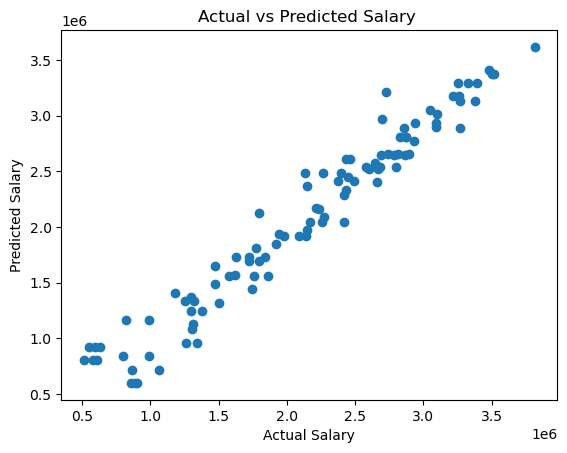

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lr_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary ")
plt.show()


In [9]:
#SAVING BEST MODEL
import pickle

pickle.dump(dt, open("model.pkl", "wb"))
pickle.dump(le, open("encoder.pkl", "wb"))



In [11]:
import joblib

# Save Linear Regression
joblib.dump(lr, "linear_model.pkl")

# Save Decision Tree
joblib.dump(dt, "decision_tree_model.pkl")


['decision_tree_model.pkl']